In [3]:
%matplotlib inline
from __future__ import division, print_function
import pylab as plt
import book_format
book_format.load_style(name='/styles/custom4.css')

# Markov Decision Processes and Dynamic Optimization

So far we have seen a number of approaches for calculating optimal decisions from a set of competing alternative actions. However, making optimal decisions when outcomes or events occur over time is more difficult. This is particularly the case when there is uncertainty in the dynamics of the system. That is, the state transitions from one point in time to the next can be influenced by decisions made at each step.

It can be useful to model these problems as a discrete time Markov process. Markov processes have the property that the future depends on the current state, but not past states. In other words, the transitions are *conditionally independent* of past states, given the present state.

$$\begin{gathered}
\begin{split}Pr(X_{t+1}=x_{t+1} | X_t=x_t, X_{t-1}=x_{t-1},\ldots,X_0=x_0) = Pr(X_{t+1}=x_{t+1} | X_t=x_t)\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

This is the Markovian property.

A **discrete** Markov process is one where the state space is *countable*. It describes movement from state $i$ to state $j$ over some interval of time $\Delta t$.

$$p(X_{t + \Delta t} = j | X_t = i)$$

It is useful to think of the Markovian property as “mild non-independence”.

## Markov Chains

A Markov chain is a special type of discrete Markov process, where the time step $\Delta t=1$ and the transitions are stationary. Stationarity implies that the transition probabilities are time-homogeneous.

$$p_ij = p(X_{t + 1} = j | X_t = i)$$

The Markov chain wanders about the state space, remembering only where it has just been in the last time step. The collection of transition probabilities is sometimes called a *transition matrix* when dealing with discrete states, or more generally, a *transition kernel*.

$$P = \left[{
\begin{array}{c}
  {p_{11}} & {p_{12}} & \ldots & {p_{1k}}  \\
  {p_{21}} & {p_{22}} & \ldots & {p_{2k}}  \\
  \vdots & \vdots & \ddots & \vdots \\
  {p_{k1}} & {p_{k2}} & \ldots & {p_{kk}}  \\
\end{array}
}\right]$$

Row $i$ of the matrix are the probabilities of moving from state $i$ to each possible state $j$ (including $i$ itself); hence the rows sum to 1.

### Example: Disease dynamics

One can simulate the dynamics of an infectious disease using a discrete Markov process. This example is from Zipkin et al. (2010), which examined an avian disease affecting house ﬁnch (*Carpodacus mexicanus*) populations. The *Mycoplasma gallisepticum* pathogen caused a major epidemic of conjunctivitis in house ﬁnches in 1994, and was modeled by Zipkin et al.

In [15]:
import numpy as np

P = np.array([[0.90, 0.05, 0.05],
                [0.10, 0.70, 0.20],
                [0, 0, 1]])
P

array([[ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.7 ,  0.2 ],
       [ 0.  ,  0.  ,  1.  ]])

The rows are the state of a process for a given individual (0 = susceptible, 1 = infected and 2 = dead) at time $t$ and the columns indicate the state of the process at the following time step $t + 1$.

Let's use this transition matrix to simulate the disease dynamics of a population of 100 susceptible individuals.

In [26]:
x = [100, 0, 0]

For each step in the process, the transition matrix will be multiplied by the current vector of states, to yield an updated vector of states.

In [29]:
# Initialize list with initial states
X = [x]

for t in range(20):
    # Calculate transistion
    new_x = P.T.dot(X[-1])
    # Append new vector to list
    X.append(new_x)

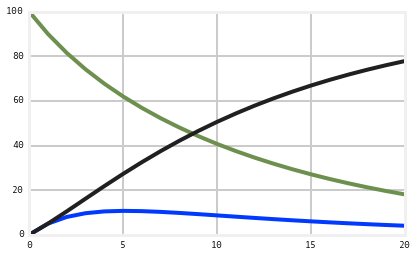

In [30]:
%matplotlib inline
import pylab as pl

pl.plot(X)

A policy is a function that maps states to actions:

$$\pi: S \mapsto A$$

## Markov Decision Process

A Markov decision process (MDP) is defined by its available states and alternative actions, as well as by the state dynamics inherent to the environment.

State dynamics:

$$f_t(x_t, a_t, z_t)$$

Reward function:

$$r_t(x_t, x_{t+1}, a_t, x_t)$$

Terminal value function:

$$v_T(x_T)$$

for states $x_t \in X_t$, decsisions $a_t \in A_t$, and vector of random variables $ Z_t$ that has probability function:

$$p(Z_t=z_t| x_t, a_t)$$

Because each iteration of a standard Markov process can evaluate only one set of decision rules at a time, simulation models based on standard Markov processes can be computationally impractical if there are a large number of possible embedded decisions, or decisions that occur repetitively over time. 


### Decision epochs

### State space

### Action space

### Transition probabilities

### Reward function

An optimal policy $\pi^*$ maximizes $V_{\pi}(s)$ for all states

## SDP algorithm

Initialize the optimal value fuction (lookup table) $v^*_{t+1}(x\_{t+1}) = v_T(x_T)$

For each value of $x_t$, $a_t$, $z_t$ compute the next state:

$$x_{t+1} = f_t(x_t, a_t, z_t)$$

along with the associated probability 

$$Pr[x_{t+1} = f_t(x_t a_t, z_t)] = p(z_t | x_t, a_t)$$

Compute the optimal value function for the current time step

$$V_t^*(x_t) = \max_{a_t \in A_t} \left[ \sum_{z_t \in Z_t} p(z_t|a_t,z_t)[v^*_{t+1}(x_{t+1}) + r_t(x_t, x_{t+1},a_t,z_t)]\right] $$ 

However, we cannot evaluate $v^*_{t+1}(x\_{t+1})$ directly, since it is a function of discrete values of $x_t$. Thus, an interpolation must be performed:

$$v^*_{t+1}(x\_{t+1}) = L(v^*_{t+1}(X\_{t+1}), x_{t+1})$$

where $L$ is the linear interpolation function.

We then substitute the state dynamics function into the value function, so that it is expressed in terms of values at time $t$:

$$V_t^*(x_t) = \max_{a_t \in A_t} \left[ \sum_{z_t \in Z_t} p(z_t|a_t,z_t)[L(v^*_{t+1}(X\_{t+1}), \color{red}{f_t(x_t, a_t, z_t)}) + r_t(x_t, x_{t+1},a_t,z_t)]\right] $$ 



## Markov Decision Processes

> Policy: policy $d$ is a sequence of the decision rules to be used at each decision epoch

A policy is *stationary* if $d_t = d$ for all $t \in T$

For any specific policy, an MDP reduces to a standard Markov process

An optimal policy maximizes a measure of long-run expected rewards

### Discounting

The use of a discount factor is sufficient to ensure the existence of an optimal policy.

terminal reward function

Optimal stationary policies still exist in the absence of a discounting factor when there is an absorbing state with immediate reward 0.

In a stationary infinite-horizon MDP, the time indices can be dropped.

For a given state $s_t$ and action $a$, the total expected reward is calculated by summing the immediate reward, $r_t(s,a)$, and future reward.

backward induction

in some real-world problems, the actual system state is not entirely known by the decision maker, rendering the states only partially observable. Such MDPs are known as POMDPs.


In [4]:
# States
A = 1
B = 2
CRUISE = 3
STAND = 4

# Transactions
T = {}
T[CRUISE] = {
    A: {A: 0.9, B: 0.1}, 
    B: {A: 0.1, B: 0.9}
}
T[STAND] = {
    A: {A: 0.4, B: 0.6}, 
    B: {A: 0.6, B: 0.4}
}

# Rewards
R = {
    CRUISE: {A: 8, B: 20}, 
    STAND: {A: 5, B: 22}
}
# Dictionary
DICT = {A: "A", B: "B", CRUISE: "CRUISE", STAND: "STAND"}

In [8]:
epsilon = 0.0001; gamma = 0.8; max_iters = 100

def optimize(states, actions, R, T):
    
    V = {}; V2 = {}
    logs = {};
    for s in states:
        logs[s] = {}
        for a in actions:
            logs[s][a] = []
        
    for s in states:
        V[s] = 0
        V2[s] = 0
    for iteration in range(max_iters):
        for s in states:
            value_candidates = []
            for a in actions:
                value = R[a][s] + gamma * sum(T[a][s][s2]*V[s2] for s2 in states)
                value_candidates.append(value)
                logs[s][a].append(value)
            V2[s] =max(value_candidates)
        if max(abs(V2[s] - V[s]) for s in states) < epsilon:
            return V2, logs
        else:
            V = V2; V2 = {}
    return V2, logs

def draw_table(states, actions, R, T, V):
    for s in states:
        for a in actions:
            value = R[a][s] + gamma * sum(T[a][s][s2]*V[s2] for s2 in states)
            print("State: %s Action: %s --> %f" % (DICT[s], DICT[a], value))

states = [A, B]
actions = [CRUISE, STAND]
optimized_V, logs = optimize(states, actions, R, T)
print("Iterations: %i" % len(logs[A][STAND]))
draw_table(states, actions, R, T, optimized_V)

Iterations: 56
State: A Action: CRUISE --> 67.473425
State: A Action: STAND --> 72.368162
State: B Action: CRUISE --> 92.105004
State: B Action: STAND --> 86.210267


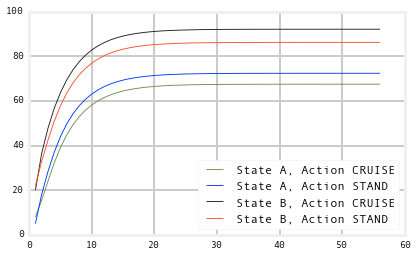

In [12]:
%matplotlib inline
import pylab as pl

x_axis = range(1, 1 + len(logs[A][STAND]))
for s in states:
    for a in actions:
        pl.plot(x_axis, logs[s][a], label="State %s, Action %s" % (DICT[s], DICT[a]), linewidth=0.9)
pl.legend(loc=4)

## Dynamic Programming

## Value and Policy Iteration

2 fundamental algorithms to solve infinite-horizon discounted MDPs: value iteration and policy iteration methods 

value iteration starts with an arbitrary value for each state and, at each iteration, solves equation 4 using the value from the previous iteration until the difference between successive values becomes sufficiently small

It starts with an arbitrary decision rule and finds its value; if an improvement in the current decision rule is possible, using the current value function estimate, then the algorithm will find it; otherwise, the algorithm will stop, yielding the optimal decision rule.

in many situations, the stationary assumption is not reasonable, such as when the transition probability represents the probability of a disease outcome that is increasing over time or when agedependent mortality is involved

Policy iteration algorithm finds the value of a policy by applying the backward induction algorithm

In [13]:
import mdptoolbox.example
P, R = mdptoolbox.example.forest()
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()
vi.policy # result is (0, 0, 0)

(0, 0, 0)

## Case Study: Optimal fire management of a threatened species

We will apply dynamic optimization methods implemented in **PyMDPtoolbox**, a Markov decison process (MDP) toolbox for Python. An early application of these methods to wildlife biology was by Possingham and Tuck (1997).

---

## References

1.	Possingham H, Tuck G. Application of Stochastic Dynamic Programming to Optimal Fire Management of a Spatially Structured Threatened Species. In *Proceedings International Congress on Modelling and simulation*; 1997.

2.	Zipkin EF, Jennelle CS, Cooch EG. A primer on the application of Markov chains to the study of wildlife disease dynamics. Methods in Ecology and Evolution. 2010;1(2):192–198. doi:10.1111/j.2041-210X.2010.00018.x.